In [1]:
import pandas as pd 
import numpy as np

In [2]:
data1=pd.read_csv('train_values.csv')
data2=pd.read_csv('train_labels.csv')
data2=data2.drop(['patient_id'],axis=1)
data2.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [3]:
data1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

In [5]:
final=pd.concat([data1,data2],axis=1)
final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
import missingno
missingno.matrix(final,figsize=(20,10))

C:\Users\kartik sonagelaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0    100
1     80
Name: heart_disease_present, dtype: int64


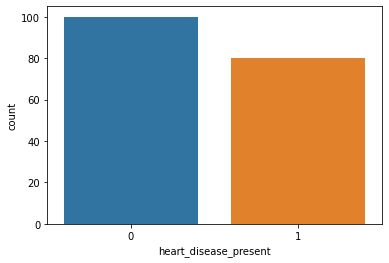

In [7]:
import seaborn as sns
sns.countplot(x='heart_disease_present',data=final)
print(final.heart_disease_present.value_counts())

In [8]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [9]:
df_bin['slope_of_peak_exercise_st_segment'] = final['slope_of_peak_exercise_st_segment']
df_con['slope_of_peak_exercise_st_segment'] = final['slope_of_peak_exercise_st_segment']

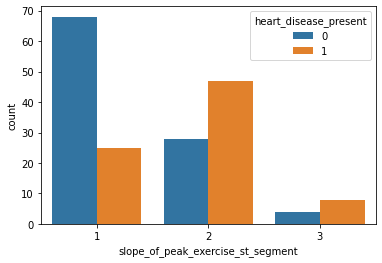

In [10]:
sns.countplot(x='slope_of_peak_exercise_st_segment',hue='heart_disease_present',data=final)

# FEATURE THAL

In [11]:
final.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

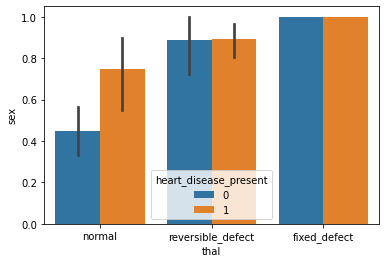

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

#sns.countplot(x='thal',hue='heart_disease_present',data=final)
sns.barplot(x='thal',y='sex',hue='heart_disease_present',data=final)
#plt.figure(figsize=(100, 100))

In [13]:
df_bin['thal'] = final['thal']
df_con['thal'] = final['thal']

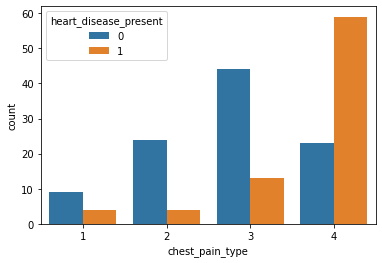

In [14]:
sns.countplot(x='chest_pain_type',hue='heart_disease_present',data=final)

In [15]:
df_bin['chest_pain_type'] = final['chest_pain_type']
df_con['chest_pain_type'] = final['chest_pain_type']

In [16]:
final.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

In [17]:
df_bin['exercise_induced_angina'] = final['exercise_induced_angina']
df_con['exercise_induced_angina'] = final['exercise_induced_angina']

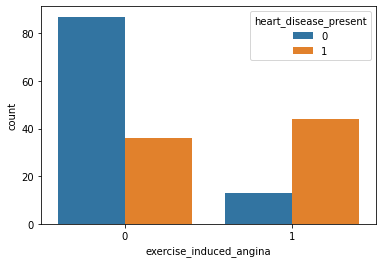

In [18]:
sns.countplot(x='exercise_induced_angina',hue='heart_disease_present',data=final)


In [19]:
df_bin['num_major_vessels']=final['num_major_vessels']
df_con['num_major_vessels']=final['num_major_vessels']

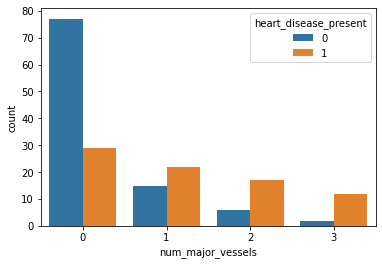

In [20]:
sns.countplot(x='num_major_vessels',hue='heart_disease_present',data=final)

In [21]:
  df_bin['fasting_blood_sugar_gt_120_mg_per_dl']=final['fasting_blood_sugar_gt_120_mg_per_dl']
df_con['fasting_blood_sugar_gt_120_mg_per_dl']=final['fasting_blood_sugar_gt_120_mg_per_dl']

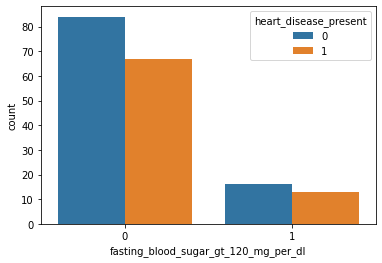

In [22]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',hue='heart_disease_present',data=final)

In [23]:
df_bin['resting_ekg_results']=final['resting_ekg_results']
df_con['resting_ekg_results']=final['resting_ekg_results']

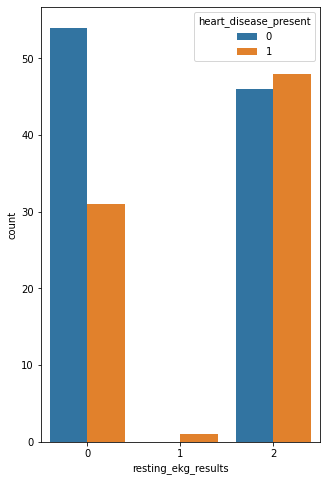

In [24]:
sns.countplot(x='resting_ekg_results',hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(5,8)

In [25]:
df_bin['heart_disease_present']=final['heart_disease_present']
df_con['heart_disease_present']=final['heart_disease_present']

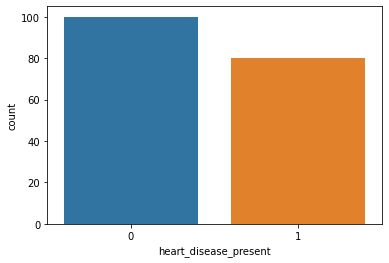

In [26]:
sns.countplot(x='heart_disease_present',data=final)

In [27]:
df_bin['sex']=final['sex']
df_con['sex']=final['sex']

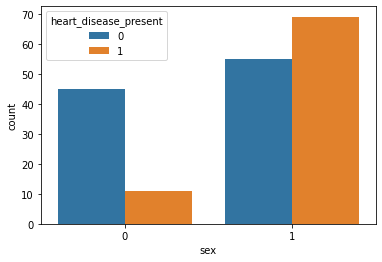

In [28]:
sns.countplot(x='sex',hue='heart_disease_present',data=final)

In [29]:
df_con['age'] = final['age'] 
df_bin['age'] = pd.cut(final['age'], bins=5)

In [30]:
len(final['resting_blood_pressure'].unique())

36

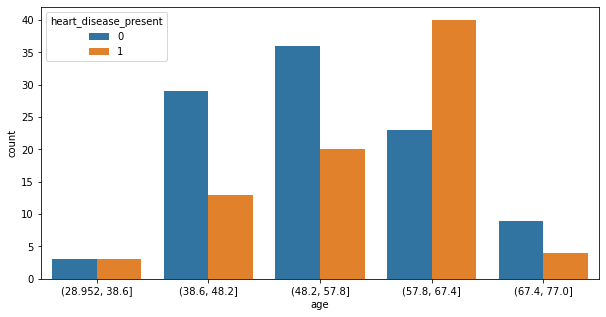

In [31]:
g=sns.countplot(x=df_bin['age'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [32]:
final['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [33]:
df_con['resting_blood_pressure'] = final['resting_blood_pressure'] 
df_bin['resting_blood_pressure'] = pd.cut(final['resting_blood_pressure'], bins=6
                                         )

In [34]:
df_bin.resting_blood_pressure.value_counts()

(122.667, 137.0]      59
(108.333, 122.667]    48
(137.0, 151.333]      42
(151.333, 165.667]    13
(93.914, 108.333]     11
(165.667, 180.0]       7
Name: resting_blood_pressure, dtype: int64

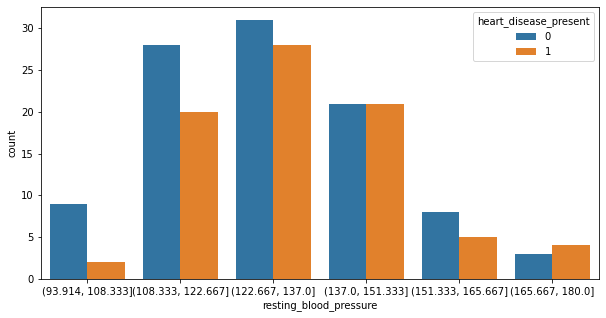

In [35]:
g=sns.countplot(x=df_bin['resting_blood_pressure'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [36]:
final.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [37]:
final.serum_cholesterol_mg_per_dl.value_counts()

204    4
239    4
219    3
254    3
309    3
      ..
164    1
167    1
168    1
220    1
172    1
Name: serum_cholesterol_mg_per_dl, Length: 118, dtype: int64

In [38]:
df_con['serum_cholesterol_mg_per_dl'] = final['serum_cholesterol_mg_per_dl'] 
df_bin['serum_cholesterol_mg_per_dl'] = pd.cut(final['serum_cholesterol_mg_per_dl'], bins=5)

In [39]:
df_bin.serum_cholesterol_mg_per_dl.value_counts()

(213.6, 301.2]      106
(125.562, 213.6]     45
(301.2, 388.8]       27
(476.4, 564.0]        1
(388.8, 476.4]        1
Name: serum_cholesterol_mg_per_dl, dtype: int64

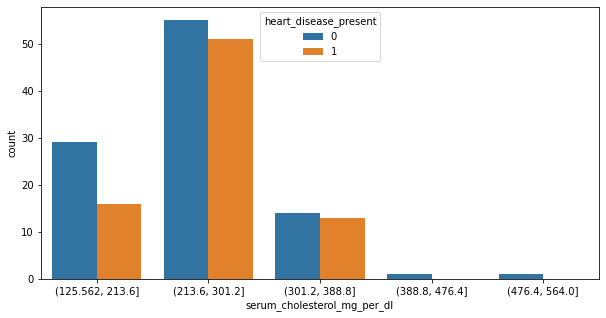

In [40]:
g=sns.countplot(x=df_bin['serum_cholesterol_mg_per_dl'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [41]:
final.max_heart_rate_achieved.value_counts()

162    10
132     6
142     6
150     5
170     5
       ..
180     1
184     1
186     1
188     1
96      1
Name: max_heart_rate_achieved, Length: 73, dtype: int64

In [42]:
df_con['max_heart_rate_achieved'] = final['max_heart_rate_achieved'] 
df_bin['max_heart_rate_achieved'] = pd.cut(final['max_heart_rate_achieved'], bins=5)

In [43]:
df_bin.max_heart_rate_achieved.value_counts()

(159.6, 180.8]     60
(138.4, 159.6]     60
(117.2, 138.4]     32
(95.894, 117.2]    19
(180.8, 202.0]      9
Name: max_heart_rate_achieved, dtype: int64

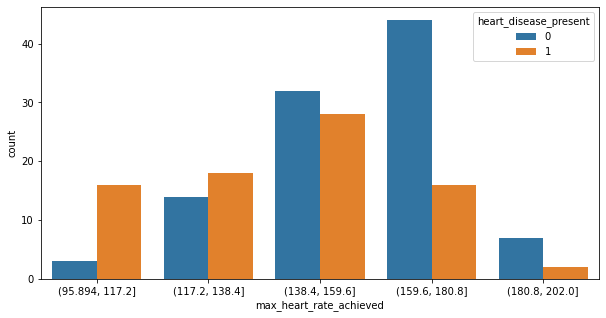

In [44]:
g=sns.countplot(x=df_bin['max_heart_rate_achieved'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [45]:
len(final.oldpeak_eq_st_depression.value_counts())


34

In [46]:
df_con['oldpeak_eq_st_depression'] = final['oldpeak_eq_st_depression'] 
df_bin['oldpeak_eq_st_depression'] = pd.cut(final['oldpeak_eq_st_depression'], bins=9)

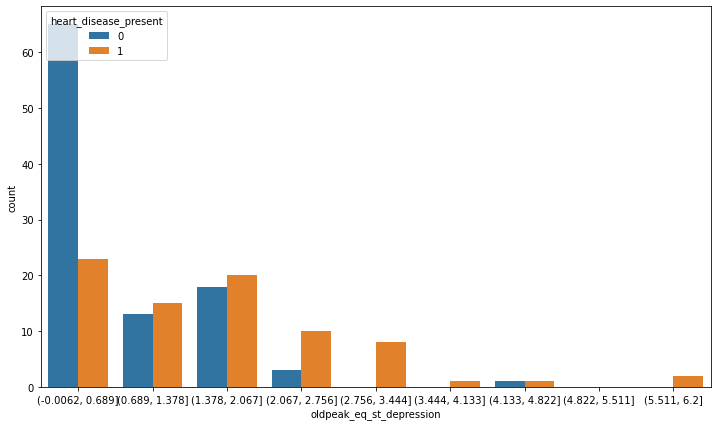

In [47]:
g=sns.countplot(x=df_bin['oldpeak_eq_st_depression'],hue='heart_disease_present',data=final)
fig = plt.gcf()
fig.set_size_inches(12, 7)

In [48]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols

['slope_of_peak_exercise_st_segment',
 'thal',
 'chest_pain_type',
 'exercise_induced_angina',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'heart_disease_present',
 'sex',
 'age',
 'resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'max_heart_rate_achieved',
 'oldpeak_eq_st_depression']

In [49]:
df_bin.head()

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,exercise_induced_angina,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex,age,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,oldpeak_eq_st_depression
0,1,normal,2,0,0,0,2,0,1,"(38.6, 48.2]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
1,2,normal,3,0,0,0,0,0,0,"(48.2, 57.8]","(108.333, 122.667]","(213.6, 301.2]","(138.4, 159.6]","(1.378, 2.067]"
2,1,normal,4,1,3,0,2,1,1,"(67.4, 77.0]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
3,1,reversible_defect,4,0,0,0,0,1,1,"(38.6, 48.2]","(151.333, 165.667]","(213.6, 301.2]","(180.8, 202.0]","(-0.0062, 0.689]"
4,3,reversible_defect,1,0,0,0,2,0,1,"(57.8, 67.4]","(165.667, 180.0]","(213.6, 301.2]","(138.4, 159.6]","(4.133, 4.822]"


In [50]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()


,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,"max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]"
0,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
test=df_bin_enc
len(test.columns.tolist())

55

In [52]:
selected=test.drop(['heart_disease_present_0', 'heart_disease_present_1'], axis = 1) 

In [53]:
x_train=selected
x_train.columns.tolist()

['slope_of_peak_exercise_st_segment_1',
 'slope_of_peak_exercise_st_segment_2',
 'slope_of_peak_exercise_st_segment_3',
 'thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'num_major_vessels_0',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'fasting_blood_sugar_gt_120_mg_per_dl_0',
 'fasting_blood_sugar_gt_120_mg_per_dl_1',
 'resting_ekg_results_0',
 'resting_ekg_results_1',
 'resting_ekg_results_2',
 'sex_0',
 'sex_1',
 'age_(28.952, 38.6]',
 'age_(38.6, 48.2]',
 'age_(48.2, 57.8]',
 'age_(57.8, 67.4]',
 'age_(67.4, 77.0]',
 'resting_blood_pressure_(93.914, 108.333]',
 'resting_blood_pressure_(108.333, 122.667]',
 'resting_blood_pressure_(122.667, 137.0]',
 'resting_blood_pressure_(137.0, 151.333]',
 'resting_blood_pressure_(151.333, 165.667]',
 'resting_blood_pressure_(165.667, 180.0]',
 'serum_cho

In [54]:
y_train=df_bin.heart_disease_present
y_train

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [55]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [56]:
# Start Python Imports
import math, time, random, datetime
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\kartik sonagelaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 88.89
Accuracy CV 10-Fold: 82.22
Running Time: 0:00:13.233063


In [57]:
from sklearn.neighbors import KNeighborsClassifier
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 86.11
Accuracy CV 10-Fold: 83.33
Running Time: 0:00:00.707216


In [58]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 72.22
Accuracy CV 10-Fold: 71.11
Running Time: 0:00:00.055851


In [59]:
from sklearn.svm import LinearSVC
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 91.11
Accuracy CV 10-Fold: 80.0
Running Time: 0:00:00.095743


In [60]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 88.89
Accuracy CV 10-Fold: 75.56
Running Time: 0:00:00.188931


In [61]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 74.44
Running Time: 0:00:00.281032


In [62]:
# Gradient Boosting Trees
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 99.44
Accuracy CV 10-Fold: 78.33
Running Time: 0:00:00.794869


In [63]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
              ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,99.44
4,Linear SVC,91.11
1,Logistic Regression,88.89
3,Stochastic Gradient Decent,88.89
0,KNN,86.11
2,Naive Bayes,72.22


In [64]:
##comparing cross validation
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'
              ],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
       
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,KNN,83.33
1,Logistic Regression,82.22
4,Linear SVC,80.00
6,Gradient Boosting Trees,78.33
3,Stochastic Gradient Decent,75.56
5,Decision Tree,74.44
2,Naive Bayes,71.11


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x_train, y_train = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
acc = round(clf.score(x_train, y_train) * 100, 2)


C:\Users\kartik sonagelaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
print(acc)

94.7


In [70]:
from sklearn.model_selection import cross_val_score
print( np.mean(cross_val_score(clf, x_train, y_train, cv=10)))

0.9377846784678467


In [71]:
 #saving model
import pickle
pickle.dump(clf, open('model.pkl','wb'))
model= pickle.load(open('model.pkl','rb'))